In [46]:
#' ---
#' title: Coursework 1 - Simple linear and multiple linear regression
#' date: 23 Nov 2017
#' ---
#Set directory 
library(car)
library(calibrate)
library("ggplot2")
setwd("D:/Lancaster University/Modules/Statistical methods/Generalised Linear Models/Coursework/coursework for glm course-20171103") 
hoPric=read.csv("houseprices.csv", header=T)
names(hoPric)


[1] "housenum"      "acre"          "bedgroup"      "bikescore"    
 [5] "distance"      "garage_spaces" "no_full_baths" "no_half_baths"
 [9] "no_rooms"      "price2014"     "squarefeet"    "walkscore"    
[13] "zip"

[1] "Correlation between price and distance"


[1] -0.4492622

[1] "Correlation between price and squarefeet"


[1] 0.8016692

[1] "Correlation between price and no_full_baths"


[1] 0.5477105

[1] "Correlation between price and walkscore"


[1] 0.5150488

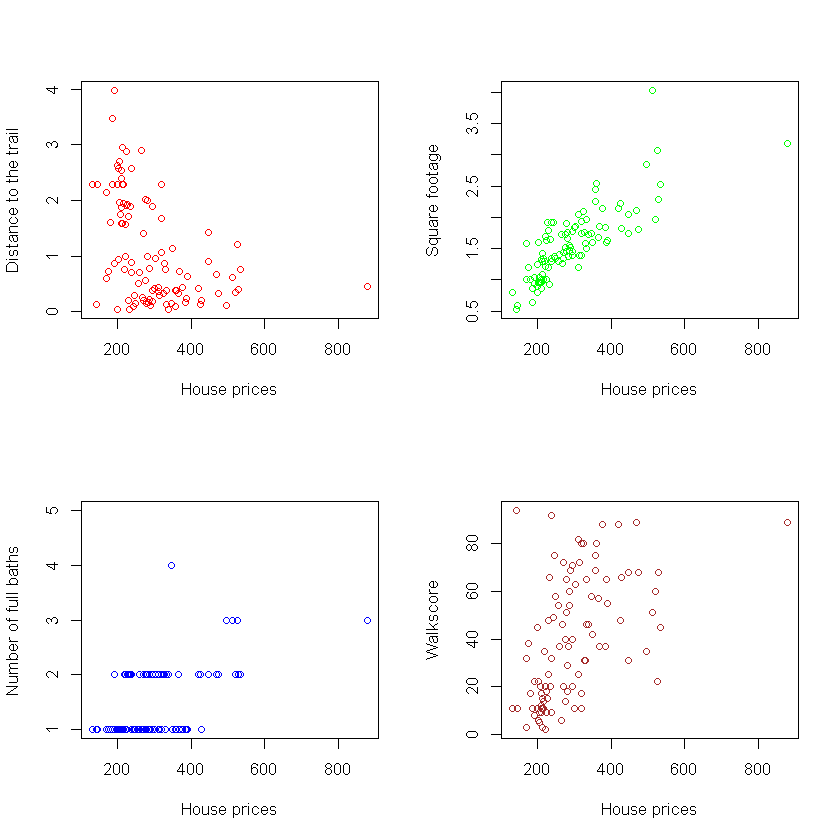

In [47]:
#Data exploration used on the report
par(mfrow=c(2,2))
plot(hoPric$price2014, hoPric$distance,  ylab="Distance to the trail", xlab = "House prices", col="red")
print("Correlation between price and distance")
cor(hoPric$price2014, hoPric$distance)
plot(hoPric$price2014, hoPric$squarefeet, ylab="Square footage", xlab = "House prices", col="green")
print("Correlation between price and squarefeet")
cor(hoPric$price2014, hoPric$squarefeet)
print("Correlation between price and no_full_baths")
plot(hoPric$price2014, hoPric$no_full_baths, ylab="Number of full baths", xlab = "House prices", col="blue", ylim=c(1, 5))
cor(hoPric$price2014, hoPric$no_full_baths)
print("Correlation between price and walkscore")
plot(hoPric$price2014, hoPric$walkscore, ylab="Walkscore", xlab = "House prices", col="brown")
cor(hoPric$price2014, hoPric$walkscore)

[1] -0.3704119

[1] -0.1912243

[1] -0.4234217

[1] -0.7607232

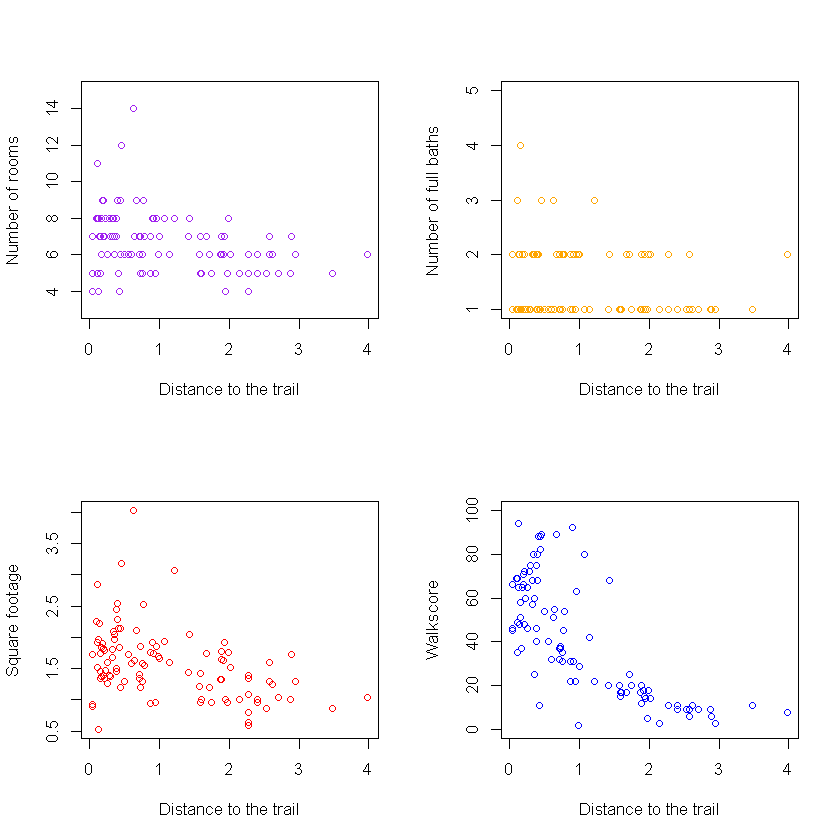

In [48]:
par(mfrow=c(2,2))
plot(hoPric$distance, hoPric$no_rooms, ylab="Number of rooms", xlab = "Distance to the trail", col="purple", ylim=c(3, 15))
cor(hoPric$no_rooms, hoPric$distance)

plot(hoPric$distance, hoPric$no_full_baths, ylab="Number of full baths", xlab = "Distance to the trail", col="orange", ylim=c(1, 5))
cor(hoPric$no_full_baths, hoPric$distance)

plot(hoPric$distance, hoPric$squarefeet, ylab="Square footage", xlab = "Distance to the trail", col="red")
cor(hoPric$squarefeet, hoPric$distance)

plot(hoPric$distance, hoPric$walkscore, ylab="Walkscore", xlab = "Distance to the trail", col="blue", ylim=c(0, 100))
cor(hoPric$walkscore, hoPric$distance)


Call:
lm(formula = price2014 ~ distance, data = hoPric)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.74  -56.27  -15.91   31.53  551.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   352.16      15.18  23.192  < 2e-16 ***
distance      -53.01      10.44  -5.079 1.72e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 99.55 on 102 degrees of freedom
Multiple R-squared:  0.2018,	Adjusted R-squared:  0.194 
F-statistic: 25.79 on 1 and 102 DF,  p-value: 1.72e-06


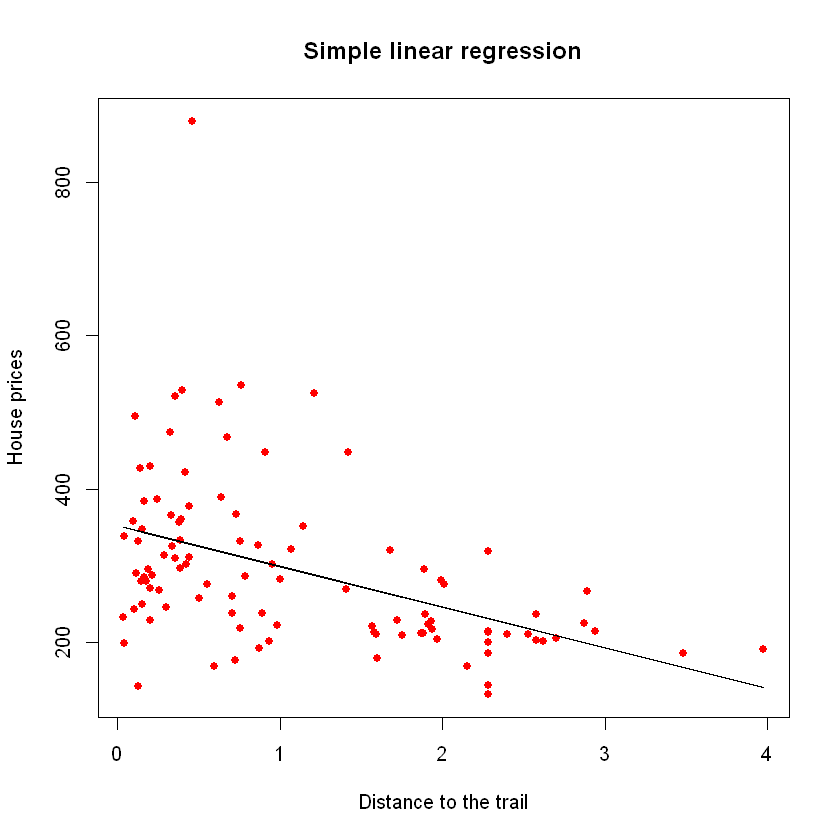

In [49]:
#Question 1 - simple linear regression  
plot(hoPric$distance,hoPric$price2014, pch=20,cex=1.3, col="red", main= "Simple linear regression", ylab="House prices", xlab="Distance to the trail") #forma bolas
#Fit a simple linear regression and to minimise the residual sum of squares
model1=lm(price2014 ~ distance, data=hoPric)
summary(model1)
lines(hoPric$distance, fitted(model1))

In [50]:
#It can be interpreted, therefore, that for every increase of a mile in distance to the trail, there is a corresponding 
#decrease of 53.01 thousand dollars in the houses prices.

In [51]:
#Question 2 - Multiple linear regression
hoPric$zipF <- factor(hoPric$zip)
#hoPric$zipF2 <- factor(c(1,2), lab = c("1060", "1062"))
reg1 <- lm(price2014 ~ acre + bedgroup + bikescore + distance + garage_spaces 
           + no_full_baths + no_half_baths + no_rooms + squarefeet + walkscore   
           + zipF , data = hoPric)
summary(reg1)



Call:
lm(formula = price2014 ~ acre + bedgroup + bikescore + distance + 
    garage_spaces + no_full_baths + no_half_baths + no_rooms + 
    squarefeet + walkscore + zipF, data = hoPric)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.646  -32.505   -0.563   26.937  283.909 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      85.9656    56.0872   1.533  0.12882   
acre            -37.6408    62.3184  -0.604  0.54734   
bedgroup3 beds   11.6855    20.0657   0.582  0.56176   
bedgroup4+ beds -10.9302    25.2252  -0.433  0.66582   
bikescore        -1.6153     0.9549  -1.692  0.09416 . 
distance         -7.9235    12.3622  -0.641  0.52317   
garage_spaces    15.7704     8.2838   1.904  0.06010 . 
no_full_baths    41.5999    13.0814   3.180  0.00201 **
no_half_baths    16.7968    17.0457   0.985  0.32704   
no_rooms          9.0681     8.3055   1.092  0.27780   
squarefeet       86.9879    26.6944   3.259  0.00157 **
walkscore         1.7

In [52]:
#It can be seen in the Figure 4 that the variables no_full_baths and squarefeet are significant (p<0.01) and they are 
#followed by walkscore and zip (p<0.05).  The other variables are not significant in this model. The R-squared of the variance 
#indicates 73.34% of variance, so it could be assumed that each variable would explain around 6,11% of variance. 

#The estimated regression coefficient of squarefeet is 86.98 and it indicates that if all other independent variables are 
#kept constant, then increase in one square feet of interior space in the house is associated with an increase of 86.98 
#thousand of dollars in the houses prices.

#Additionally, the estimated regression coefficient of no_full_bath is 41.59 and it indicates that if all other independent
#variables are held constant, then increase in one full bathroom is associated with an increase of 41.59 thousand of dollars
#in the houses prices.

In [53]:
#Question 3 - Carry out a backwards elimination from this model, removing terms one at a time until all non-significant 
#terms have been removed from the model. You should use Anova() in library car at each step to determine the least important
#variable to remove at each step.  
#Step #1
rega1 <- lm(price2014 ~ acre + bedgroup + bikescore + distance + garage_spaces + no_full_baths + no_half_baths + no_rooms + squarefeet + walkscore   
           + zipF , data = hoPric)
Anova(rega1)#all variables

,Sum Sq,Df,F value,Pr(>F)
acre,1353.726,1,0.3648253,0.547341342
bedgroup,7633.530,2,1.0286072,0.361623085
bikescore,10616.925,1,2.8612310,0.094160052
distance,1524.346,1,0.4108068,0.523171181
garage_spaces,13448.485,1,3.6243281,0.060100667
no_full_baths,37525.127,1,10.1129144,0.002013323
no_half_baths,3603.070,1,0.9710170,0.327039453
no_rooms,4423.298,1,1.1920661,0.277795435
squarefeet,39402.328,1,10.6188146,0.001574719
walkscore,24256.255,1,6.5369913,0.012221287


In [54]:
#Step #2 without acre
rega2 <- lm(price2014 ~ bedgroup + bikescore + distance + garage_spaces + no_full_baths + no_half_baths + no_rooms + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega2)#without acre

,Sum Sq,Df,F value,Pr(>F)
bedgroup,6928.316,2,0.9400710,0.394319361
bikescore,10504.562,1,2.8506303,0.094725201
distance,1554.154,1,0.4217518,0.517682344
garage_spaces,13023.077,1,3.5340815,0.063284088
no_full_baths,37617.698,1,10.2083411,0.001915637
no_half_baths,3286.052,1,0.8917383,0.347480093
no_rooms,3744.620,1,1.0161800,0.316070803
squarefeet,39069.725,1,10.6023788,0.001581825
walkscore,24787.830,1,6.7266907,0.011050600
zipF,28017.514,1,7.6031325,0.007027479


In [55]:
#Step #3 without distance
rega3 <- lm(price2014 ~ bedgroup + bikescore + garage_spaces + no_full_baths + no_half_baths + no_rooms + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega3)#without distance

,Sum Sq,Df,F value,Pr(>F)
bedgroup,6364.022,2,0.8689072,0.422786186
bikescore,9368.969,1,2.5583708,0.113103536
garage_spaces,12507.856,1,3.4155023,0.067764884
no_full_baths,37090.412,1,10.1282256,0.001985767
no_half_baths,3729.430,1,1.0183901,0.315519604
no_rooms,3030.535,1,0.8275438,0.365335355
squarefeet,43145.950,1,11.7818028,0.000894457
walkscore,23852.384,1,6.5133362,0.012336821
zipF,26464.118,1,7.2265186,0.008512188
Residuals,340573.803,93,NA,NA


In [56]:
#Step #4 without bedgroup 
rega4 <- lm(price2014 ~ bikescore + garage_spaces + no_full_baths + no_half_baths + no_rooms + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega4)#without bedgroup

,Sum Sq,Df,F value,Pr(>F)
bikescore,8750.051,1,2.395976,0.124972770
garage_spaces,13677.506,1,3.745233,0.055932265
no_full_baths,35525.316,1,9.727694,0.002403002
no_half_baths,5918.513,1,1.620632,0.206110118
no_rooms,3755.566,1,1.028365,0.313118773
squarefeet,37977.663,1,10.399206,0.001728988
walkscore,22813.791,1,6.246970,0.014156115
zipF,26511.699,1,7.259547,0.008339654
Residuals,346937.826,95,NA,NA


In [57]:
#Step #5 without no_rooms 
rega5 <- lm(price2014 ~ bikescore + garage_spaces + no_full_baths + no_half_baths + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega5)#without no_rooms 

,Sum Sq,Df,F value,Pr(>F)
bikescore,8917.68,1,2.441156,1.214797e-01
garage_spaces,11593.08,1,3.173529,7.800298e-02
no_full_baths,35175.50,1,9.629061,2.516022e-03
no_half_baths,5242.38,1,1.435067,2.338885e-01
squarefeet,132736.42,1,36.335719,3.074984e-08
walkscore,25395.67,1,6.951897,9.766210e-03
zipF,24023.57,1,6.576294,1.188481e-02
Residuals,350693.39,96,NA,NA


In [58]:
#Step #6 without no_half_baths
rega6 <- lm(price2014 ~ bikescore + garage_spaces + no_full_baths + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega6)#without no_half_baths 

,Sum Sq,Df,F value,Pr(>F)
bikescore,8256.941,1,2.250191,1.368459e-01
garage_spaces,12053.606,1,3.284862,7.301510e-02
no_full_baths,29949.457,1,8.161858,5.234516e-03
squarefeet,183375.438,1,49.973672,2.403557e-10
walkscore,24259.225,1,6.611150,1.165313e-02
zipF,22464.041,1,6.121925,1.508823e-02
Residuals,355935.772,97,NA,NA


In [59]:
#Step #7 without bikescore
rega7 <- lm(price2014 ~ garage_spaces + no_full_baths + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega7)#without bikescore

,Sum Sq,Df,F value,Pr(>F)
garage_spaces,8041.665,1,2.163918,1.444878e-01
no_full_baths,26410.688,1,7.106807,8.982884e-03
squarefeet,187518.910,1,50.459146,1.962556e-10
walkscore,30135.130,1,8.109011,5.366599e-03
zipF,16076.092,1,4.325888,4.014685e-02
Residuals,364192.713,98,NA,NA


In [60]:
#Step #8 without garage_spaces
rega8 <- lm(price2014 ~ no_full_baths + squarefeet + walkscore   
            + zipF , data = hoPric)
Anova(rega8)#without garage_spaces

,Sum Sq,Df,F value,Pr(>F)
no_full_baths,24575.19,1,6.536054,1.208995e-02
squarefeet,256535.49,1,68.228554,6.633451e-13
walkscore,30657.48,1,8.153708,5.235936e-03
zipF,11609.91,1,3.087789,8.197339e-02
Residuals,372234.38,99,NA,NA


In [61]:
#The last model
#Step #9 without zipF 
rega9 <- lm(price2014 ~ no_full_baths + squarefeet + walkscore, data = hoPric)
Anova(rega9)#without zipF 
summary(rega9)

,Sum Sq,Df,F value,Pr(>F)
no_full_baths,23124.58,1,6.024468,1.583650e-02
squarefeet,270045.35,1,70.352839,3.307966e-13
walkscore,51676.13,1,13.462786,3.923783e-04
Residuals,383844.29,100,NA,NA



Call:
lm(formula = price2014 ~ no_full_baths + squarefeet + walkscore, 
    data = hoPric)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.635  -32.497   -1.176   28.674  297.549 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    23.0400    19.1630   1.202 0.232079    
no_full_baths  29.3358    11.9519   2.454 0.015836 *  
squarefeet    121.6575    14.5043   8.388 3.31e-13 ***
walkscore       0.9491     0.2587   3.669 0.000392 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 61.96 on 100 degrees of freedom
Multiple R-squared:  0.6969,	Adjusted R-squared:  0.6878 
F-statistic: 76.65 on 3 and 100 DF,  p-value: < 2.2e-16


In [62]:
#It can be seen in the Figure 7 that the variables squarefeet and walkscore are highly significant (p<0.001) and they 
#are followed by no_full_baths  (p<0.05).  The R-squared of the variance indicates 69.70% of variance, so it could be 
#assumed that each variable would explain around 23,23% of variance. 

#The estimated regression coefficient of squarefeet is 121.6575 and it indicates that if all other independent variables 
#are kept constant, then increase in one square feet of interior space in the house is associated with an increase of 121.66 
#thousand of dollars in the houses prices.
    
#And the estimated regression coefficient of walkscore is 0.9491 and it shows that if all other independent variables are 
#kept constant, then increase in one score of walk friendliness is associated with an increase of 0.95 thousand of dollars 
#in the houses prices.

#Additionally, the estimated regression coefficient of no_full_bath is 29.3358 and it indicates that if all other independent 
#variables are held constant, then increase in one full bathroom is associated with an increase of is 29.34 thousand of dollars 
#in the houses prices.


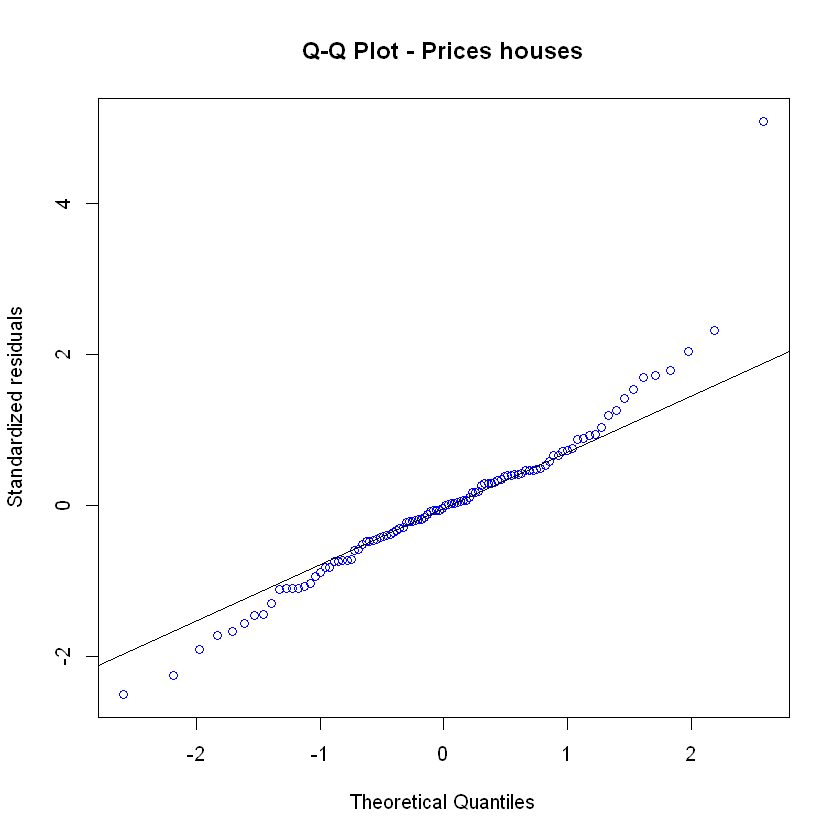

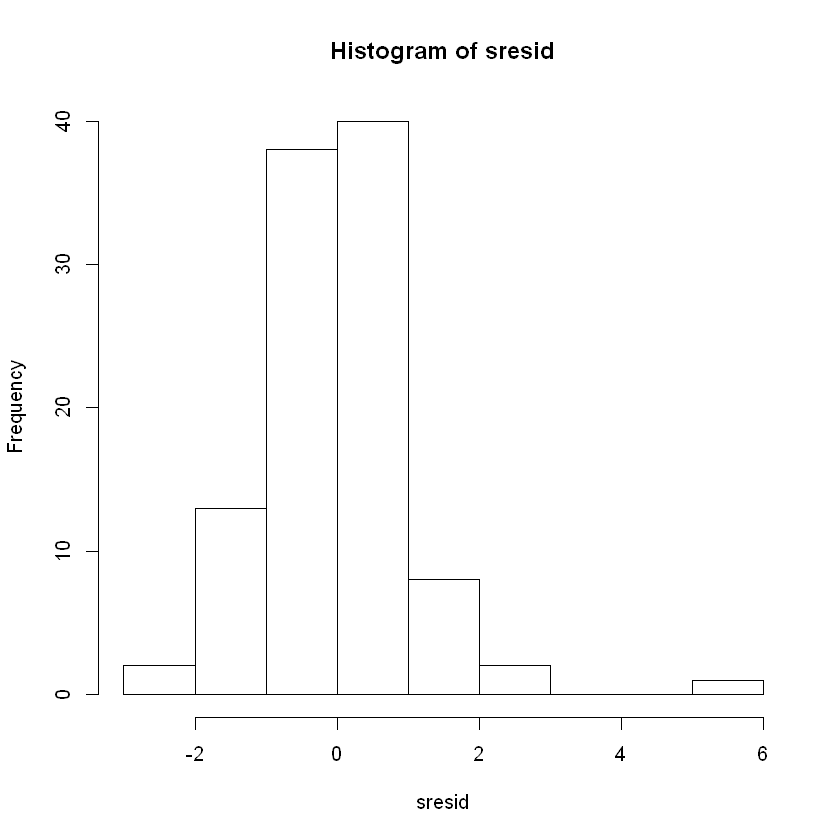

In [63]:
#Question 4
#Using standardized residuals
sresid <- rstandard(rega9)
qqnorm(sresid, ylab="Standardized residuals", 
xlab="Theoretical Quantiles", main="Q-Q Plot - Prices houses", col = "blue")
#textxy(sresid, sresid, labs = hoPric$housenum)
qqline(sresid)

hist(sresid)

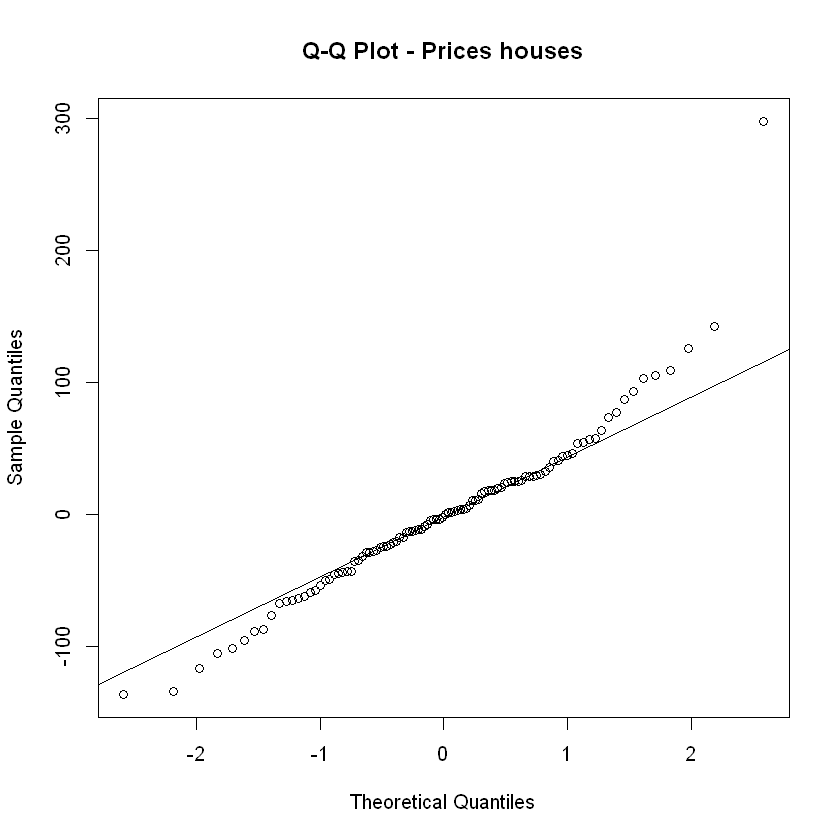

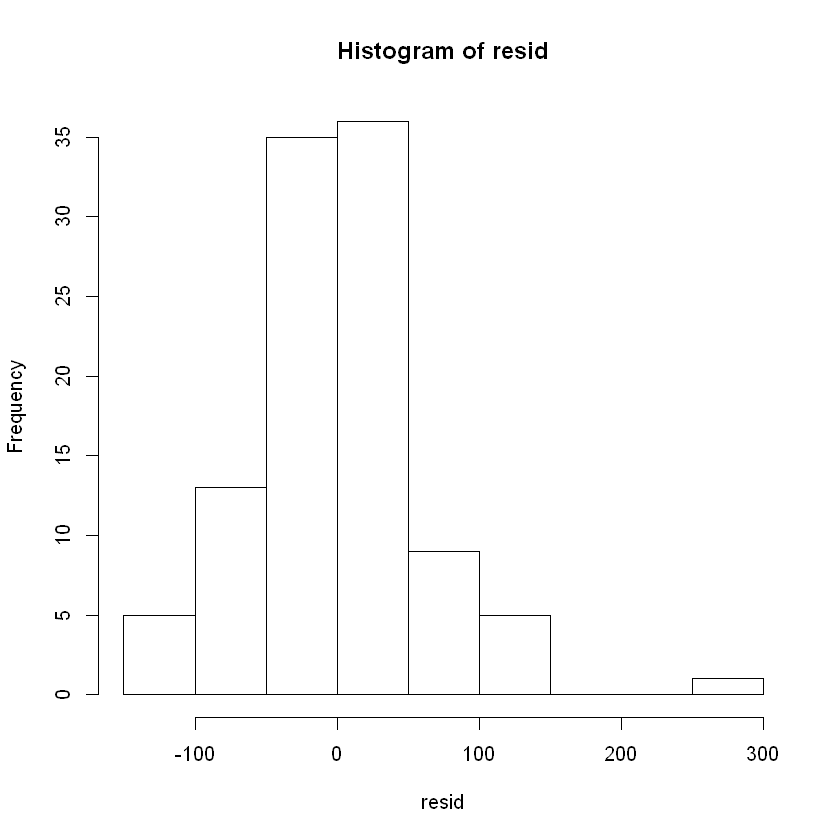

In [64]:
#Checking the normality of the residuals
resid<- residuals(rega9)
qqnorm(resid, ylab="Sample Quantiles", 
xlab="Theoretical Quantiles", main="Q-Q Plot - Prices houses") 
qqline(resid)
hist(resid)